##  Develop LSTM Models For Univariate Time Series Forecasting

amazing blog on time series forecasting from [Machine Learning Mastery](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

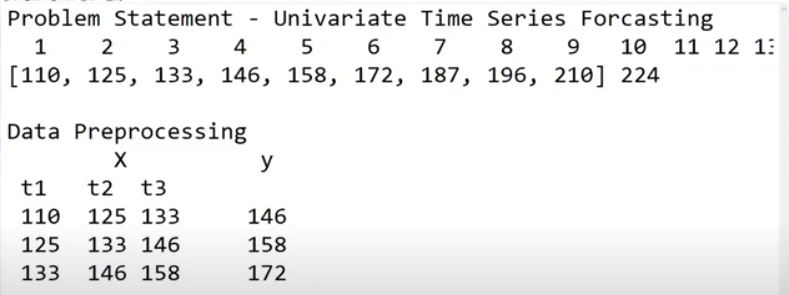

Probem Statement : Is to find the future value based on the past 3 days data. So to get the value of Day 10 we need to use day 7,8 and 9. Once we have day 10 then to get value for day 11 we need 8,9 and 10.

So in Preprocessing we create our X, y . so first row is 3 days as independent variable and day 4 as dependent. then move one step right. day 2,3,and 4 as X and day 5 as y and so on.

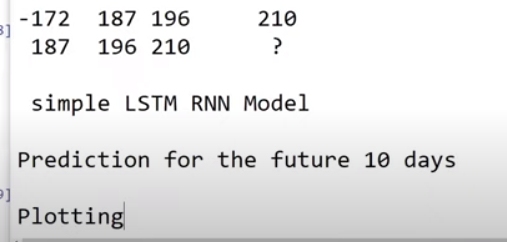

In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [14]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [15]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [16]:
print(X,y)
print(type(X),type(y))

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]] [146 158 172 187 196 210]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
X.shape

(6, 3)

In [18]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [19]:
X.shape # this is how the data has to be for LSTM

(6, 3, 1)

### Building LSTM Model

In [20]:
# define model

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1) # verbose = 0 then No output of Epochs displayed

Epoch 1/300
1/1 [==============================] - 0s 4ms/step - loss: 29775.4844
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 29467.1309
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 29154.3848
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 28843.1035
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 28515.1250
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 28168.2031
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 27801.4277
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 27410.6562
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 26988.4434
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 26528.6465
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 26027.8418
Epoch 12/300
1/1 [==============================] - 0s 4ms/step - loss: 25486.0176
Epoch 13/300


1/1 [==============================] - 0s 2ms/step - loss: 17.0850
Epoch 102/300
1/1 [==============================] - 0s 2ms/step - loss: 16.5321
Epoch 103/300
1/1 [==============================] - 0s 2ms/step - loss: 15.9119
Epoch 104/300
1/1 [==============================] - 0s 3ms/step - loss: 15.2608
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 14.6174
Epoch 106/300
1/1 [==============================] - 0s 2ms/step - loss: 14.0298
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 13.5756
Epoch 108/300
1/1 [==============================] - 0s 3ms/step - loss: 13.4013
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 13.7218
Epoch 110/300
1/1 [==============================] - 0s 3ms/step - loss: 14.2051
Epoch 111/300
1/1 [==============================] - 0s 2ms/step - loss: 14.0307
Epoch 112/300
1/1 [==============================] - 0s 3ms/step - loss: 13.3612
Epoch 113/300
1/1 [=======================

Epoch 203/300
1/1 [==============================] - 0s 2ms/step - loss: 4.0327
Epoch 204/300
1/1 [==============================] - 0s 3ms/step - loss: 4.0236
Epoch 205/300
1/1 [==============================] - 0s 2ms/step - loss: 4.0143
Epoch 206/300
1/1 [==============================] - 0s 4ms/step - loss: 4.0054
Epoch 207/300
1/1 [==============================] - 0s 997us/step - loss: 3.9963
Epoch 208/300
1/1 [==============================] - 0s 3ms/step - loss: 3.9873
Epoch 209/300
1/1 [==============================] - 0s 3ms/step - loss: 3.9785
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9694
Epoch 211/300
1/1 [==============================] - 0s 3ms/step - loss: 3.9606
Epoch 212/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9518
Epoch 213/300
1/1 [==============================] - 0s 4ms/step - loss: 3.9429
Epoch 214/300
1/1 [==============================] - 0s 5ms/step - loss: 3.9342
Epoch 215/300
1/1 [===================

### Predicting For the next 10 future days.

In [29]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    print(len(temp_input))
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features)) # input has to be given as 3 so shape to be (3,1)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

3
[225.32553]
4
1 day input [196.         210.         225.32553101]
1 day output [[236.66437]]
4
2 day input [210.         225.32553101 236.66436768]
2 day output [[251.39403]]
4
3 day input [225.32553 236.66437 251.39403]
3 day output [[266.3872]]
4
4 day input [236.66437 251.39403 266.3872 ]
4 day output [[279.8197]]
4
5 day input [251.39403 266.3872  279.8197 ]
5 day output [[295.53333]]
4
6 day input [266.3872  279.8197  295.53333]
6 day output [[311.31604]]
4
7 day input [279.8197  295.53333 311.31604]
7 day output [[326.86594]]
4
8 day input [295.53333 311.31604 326.86594]
8 day output [[344.01328]]
4
9 day input [311.31604 326.86594 344.01328]
9 day output [[361.40002]]
[225.32553, 236.66437, 251.39403, 266.3872, 279.8197, 295.53333, 311.31604, 326.86594, 344.01328, 361.40002]
